

# PEC2: Insights datos Idealista

En esta PEC2, debéis hacer el mismo ejercicio que hemos hecho en el Notebook Insight_Datos_Teleco.ipynb pero con la información de Idealista que se os proporciona junto a este Notebook y el enunciado. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Cargar librerías

In [40]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)




## 1. Lectura y unificación de datos. Puede ser tanto de la descarga de Idealista si hiciesteis la PEC1 versión con Claves, o directamente los 8 ficheros CSV. (2 puntos)

In [41]:
import os  

def leer_csv(ruta_archivo):
    df = pd.read_csv(ruta_archivo)
    return df

def leer_varios_csv(ruta_directorio, num_archivos):
    lista_dataframes = []
    
    for i in range(1, num_archivos + 1):
        nombre_archivo = f"BBDD_{i}.csv"  
        ruta_archivo = os.path.join(ruta_directorio, nombre_archivo)
        
        if os.path.exists(ruta_archivo):
            df = leer_csv(ruta_archivo)
            lista_dataframes.append(df)
        else:
            print(f"El archivo {nombre_archivo} no existe.")
    
    return lista_dataframes

ruta_directorio = "C:/Users/crist/OneDrive/Desktop/UOC"  
lista_dataframes = leer_varios_csv(ruta_directorio, 8)

if lista_dataframes:
    print(lista_dataframes[0].head())


   Unnamed: 0.1  Unnamed: 0  index  propertyCode  \
0             0           0      0      37423711   
1             1           1      1     100030792   
2             2           2      2      95563945   
3             3           3      3      96266051   
4             4           4      4      95845899   

                                                                                      thumbnail  \
0  https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/75/65/7d/1051146532.jpg   
1  https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/08/c0/ea/1065800123.jpg   
2   https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/cf/05/33/921983717.jpg   
3   https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/dd/0e/ff/942136095.jpg   
4   https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/17/29/61/930553000.jpg   

  externalReference  numPhotos floor     price propertyType  ...  \
0            Z-2030     

In [ ]:
#Ahora unifico los df tal como hice en el ejercicio anterior.
import pandas as pd
df_unificado = pd.concat(lista_dataframes, ignore_index=True)



### Comprobar lectura correcta del dataset

In [43]:
print("Primeras filas del DataFrame unificado:")
df_unificado.head()

Primeras filas del DataFrame unificado:


,Unnamed: 0.1,Unnamed: 0,index,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,labels,parkingSpace,newDevelopmentFinished
0,0.0,0.0,0.0,37423711,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/75/65/7d/1051146532.jpg,Z-2030,31.0,2,285000.0,flat,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso'}",True,False,False,False,False,False,NaN,NaN,NaN
1,1.0,1.0,1.0,100030792,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/08/c0/ea/1065800123.jpg,2019,54.0,NaN,178216.0,flat,...,"{'subtitle': 'El Guinardó, Barcelona', 'title': 'Piso en Calle del Xiprer'}",False,False,False,False,False,False,NaN,NaN,NaN
2,2.0,2.0,2.0,95563945,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/cf/05/33/921983717.jpg,52931158,13.0,NaN,333000.0,flat,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso en Calle dels Còdols'}",False,False,True,False,False,False,NaN,NaN,NaN
3,3.0,3.0,3.0,96266051,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/dd/0e/ff/942136095.jpg,4113 ALIV,27.0,2,481000.0,flat,...,"{'subtitle': ""La Dreta de l'Eixample, Barcelona"", 'title': 'Piso en Rambla de Catalunya'}",False,False,False,False,False,False,NaN,NaN,NaN
4,4.0,4.0,4.0,95845899,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/17/29/61/930553000.jpg,52457390,10.0,NaN,481000.0,flat,...,"{'subtitle': ""La Dreta de l'Eixample, Barcelona"", 'title': 'Piso en Rambla de Catalunya'}",False,False,True,False,False,False,NaN,NaN,NaN




### Comprobar dimensiones del dataset

In [44]:
print("Resumen del DataFrame unificado:")
df_unificado.info()

Resumen del DataFrame unificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21186 entries, 0 to 21185
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            5614 non-null   float64
 1   Unnamed: 0              17806 non-null  float64
 2   index                   12962 non-null  float64
 3   propertyCode            21186 non-null  int64  
 4   thumbnail               21067 non-null  object 
 5   externalReference       18796 non-null  object 
 6   numPhotos               21186 non-null  float64
 7   floor                   15890 non-null  object 
 8   price                   21186 non-null  float64
 9   propertyType            21186 non-null  object 
 10  operation               21186 non-null  object 
 11  size                    21186 non-null  float64
 12  exterior                21186 non-null  bool   
 13  rooms                   21186 non-null  float64
 14  bathr



## 2. Data Wrangling (4 puntos)



### Formateo de las variables (strings, numéricas y booleanas)

In [ ]:
# Paso 1: detectar columnas que podrían tener un tipo incorrecto. Después, se ha de buscar columnas que deberían ser numéricas pero están como 'object' y también columnas booleanas.

posibles_numericas = []
posibles_booleanas = []

for col in df_unificado.columns:
    # coversión de columnas tipo 'object' a numéricas
    if df_unificado[col].dtype == 'object':
        try:
            df_unificado[col].astype(float)
            posibles_numericas.append(col)
        except:
            pass

    # Detección de columnas que solo tienen 2 valores únicos
    if df_unificado[col].nunique() == 2:
        posibles_booleanas.append(col)

print("Columnas que podrían ser numéricas:", posibles_numericas)
print("Columnas que podrían ser booleanas:", posibles_booleanas)


Columnas que podrían ser numéricas: ['showAddress', 'newDevelopment', 'hasLift', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'newDevelopmentFinished']
Columnas que podrían ser booleanas: ['operation', 'exterior', 'showAddress', 'hasVideo', 'newDevelopment', 'hasLift', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'newDevelopmentFinished']


In [ ]:
# Paso 2: Creación de un diccionario con el tipo que le queremos dar a cada columna

dict_formatos = {}

for col in df_unificado.columns:
    if col in posibles_booleanas:
        dict_formatos[col] = 'bool'
    elif col in posibles_numericas:
        dict_formatos[col] = 'float64'
    elif df_unificado[col].dtype == 'int64':
        dict_formatos[col] = 'int'
    elif df_unificado[col].dtype == 'float64':
        dict_formatos[col] = 'float'
    else:
        dict_formatos[col] = 'str'

print("Diccionario de tipos asignados:", dict_formatos)


Diccionario de tipos asignados: {'Unnamed: 0.1': 'float', 'Unnamed: 0': 'float', 'index': 'float', 'propertyCode': 'int', 'thumbnail': 'str', 'externalReference': 'str', 'numPhotos': 'float', 'floor': 'str', 'price': 'float', 'propertyType': 'str', 'operation': 'bool', 'size': 'float', 'exterior': 'bool', 'rooms': 'float', 'bathrooms': 'float', 'address': 'str', 'province': 'str', 'municipality': 'str', 'district': 'str', 'country': 'str', 'neighborhood': 'str', 'latitude': 'float', 'longitude': 'float', 'showAddress': 'bool', 'url': 'str', 'distance': 'int', 'description': 'str', 'hasVideo': 'bool', 'status': 'str', 'newDevelopment': 'bool', 'hasLift': 'bool', 'priceByArea': 'float', 'detailedType': 'str', 'suggestedTexts': 'str', 'hasPlan': 'bool', 'has3DTour': 'bool', 'has360': 'bool', 'hasStaging': 'bool', 'superTopHighlight': 'float64', 'topNewDevelopment': 'float64', 'labels': 'str', 'parkingSpace': 'str', 'newDevelopmentFinished': 'bool'}


In [ ]:
# Paso 3: Aplicar el formato correcto a cada columna usando el diccionario
df_unificado = df_unificado.astype(dict_formatos)
df_unificado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21186 entries, 0 to 21185
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            5614 non-null   float64
 1   Unnamed: 0              17806 non-null  float64
 2   index                   12962 non-null  float64
 3   propertyCode            21186 non-null  int32  
 4   thumbnail               21186 non-null  object 
 5   externalReference       21186 non-null  object 
 6   numPhotos               21186 non-null  float64
 7   floor                   21186 non-null  object 
 8   price                   21186 non-null  float64
 9   propertyType            21186 non-null  object 
 10  operation               21186 non-null  bool   
 11  size                    21186 non-null  float64
 12  exterior                21186 non-null  bool   
 13  rooms                   21186 non-null  float64
 14  bathrooms               21186 non-null



### Comprobación y eliminación de registros repetidos

In [ ]:
# Comprobación para ver si existen registros duplicados en el dataFrame
duplicados = df_unificado.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")


Número de registros duplicados: 2718


In [ ]:
# Eliminación de los registros duplicados
df_unificado = df_unificado.drop_duplicates()
print(f"Número de registros después de eliminar duplicados: {df_unificado.shape[0]}")


Número de registros después de eliminar duplicados: 18468




### Comprobación de columnas que no aportan información

In [ ]:
# Se procede a identificar las columnas que no aportan información: todas sus filas tienen el mismo valor
columnas_sin_varianza = [col for col in df_unificado.columns if df_unificado[col].nunique() <= 1]

print(f"Columnas sin variabilidad (mismo valor en todas las filas): {columnas_sin_varianza}")


Columnas sin variabilidad (mismo valor en todas las filas): ['operation', 'superTopHighlight', 'topNewDevelopment']


In [ ]:
#Verificar que las columnas no contengan info relevante 
for col in columnas_sin_varianza:
    print(f"\nValores únicos en la columna '{col}':")
    print(df_unificado[col].value_counts(dropna=False))



Valores únicos en la columna 'operation':
operation
True    18468
Name: count, dtype: int64

Valores únicos en la columna 'superTopHighlight':
superTopHighlight
0.0    18400
NaN       68
Name: count, dtype: int64

Valores únicos en la columna 'topNewDevelopment':
topNewDevelopment
0.0    18400
NaN       68
Name: count, dtype: int64


In [ ]:
# Ahora ya se procede a eliminar dichas columnas
df_unificado.drop(columns=columnas_sin_varianza, inplace=True)
print(f"Dimensiones del DataFrame tras eliminar columnas sin variabilidad: {df_unificado.shape}")


Dimensiones del DataFrame tras eliminar columnas sin variabilidad: (18468, 40)




### Estudio de la varianza para las variables numéricas

In [ ]:
# Selección de las variables numéricas del DataFrame
df_numericas = df_unificado.select_dtypes(include=['int', 'float'])
df_numericas.head()


,Unnamed: 0.1,Unnamed: 0,index,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea
0,0.0,0.0,0.0,37423711,31.0,285000.0,63.0,2.0,2.0,41.380216,2.179157,1070,4524.0
1,1.0,1.0,1.0,100030792,54.0,178216.0,65.0,2.0,1.0,41.417458,2.177885,3449,2742.0
2,2.0,2.0,2.0,95563945,13.0,333000.0,97.0,4.0,1.0,41.379991,2.179267,1094,3433.0
3,3.0,3.0,3.0,96266051,27.0,481000.0,65.0,2.0,1.0,41.396123,2.158679,1388,7400.0
4,4.0,4.0,4.0,95845899,10.0,481000.0,72.0,2.0,1.0,41.392210,2.160275,1000,6681.0


In [ ]:
# Cálculo de la varianza de cada columna numérica
varianzas = df_numericas.var()

# Definición del umbral mínimo para considerar que una variable aporta información
umbral = 0.02

# Se muestran ahora  qué columnas tienen una varianza menor al umbral
columnas_baja_varianza = varianzas[varianzas < umbral]
print("Columnas con varianza baja (< 0.02):")
print(columnas_baja_varianza)


Columnas con varianza baja (< 0.02):
Series([], dtype: float64)


Se ha realizado un análisis de varianza sobre las variables numéricas. No se han detectado columnas con varianza inferior a 0.02, por lo que no es necesario eliminar ninguna en esta fase.



### Estudio de agrupaciones para las variables categóricas

In [ ]:
# Paso 1: Selección de las columnas categóricas del DataFrame
df_categoricas = df_unificado.select_dtypes(include=['object'])


In [ ]:
# Paso 2: Se procede a eliminar columnas categóricas que no aportan valor al análisis como URLs, identificadores únicos o direcciones completas
columnas_excluir = ['thumbnail', 'externalReference', 'address']
df_categoricas_filtrado = df_categoricas.drop(columns=columnas_excluir, errors='ignore')



Distribución de la variable: propertyType
propertyType
flat            12965
chalet           2999
penthouse         911
countryHouse      842
duplex            681
Name: count, dtype: int64


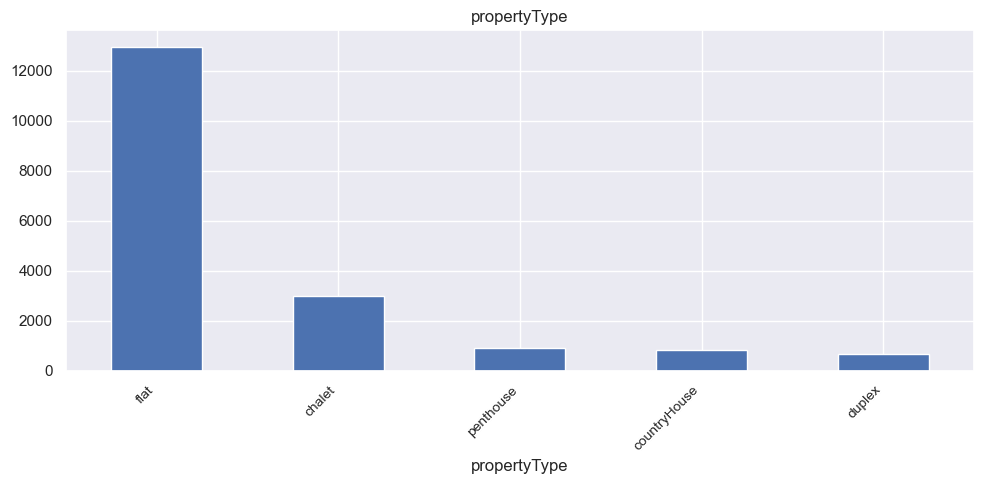


Distribución de la variable: province
province
Barcelona            7360
Tarragona            2113
Teruel               1892
Zaragoza             1272
Castellón            1049
València             1000
Madrid                999
Andorra               513
Málaga                498
Murcia                497
Vizcaya               493
Las Palmas            266
Lleida                265
Girona                109
Cerdanya Francesa      46
Cáceres                17
Álava                   6
Alicante                3
Name: count, dtype: int64


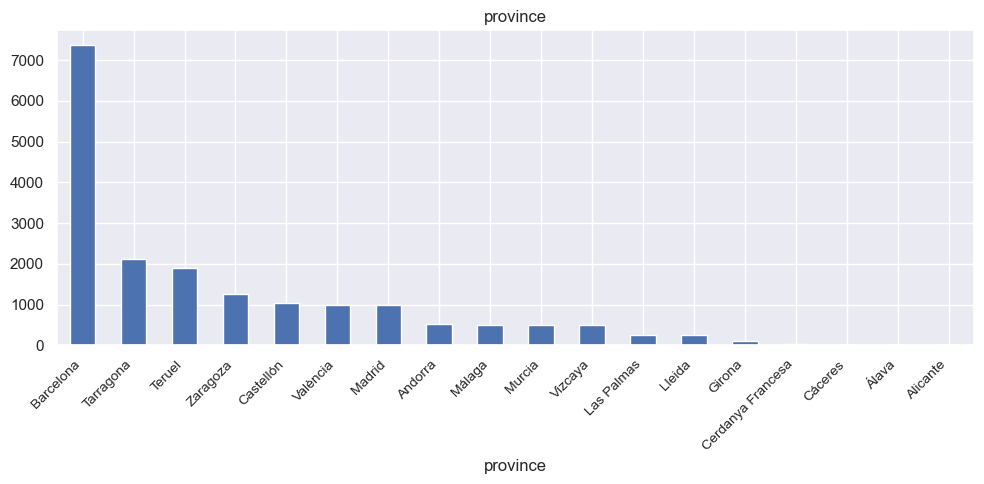


Distribución de la variable: country
country
es    18398
Name: count, dtype: int64


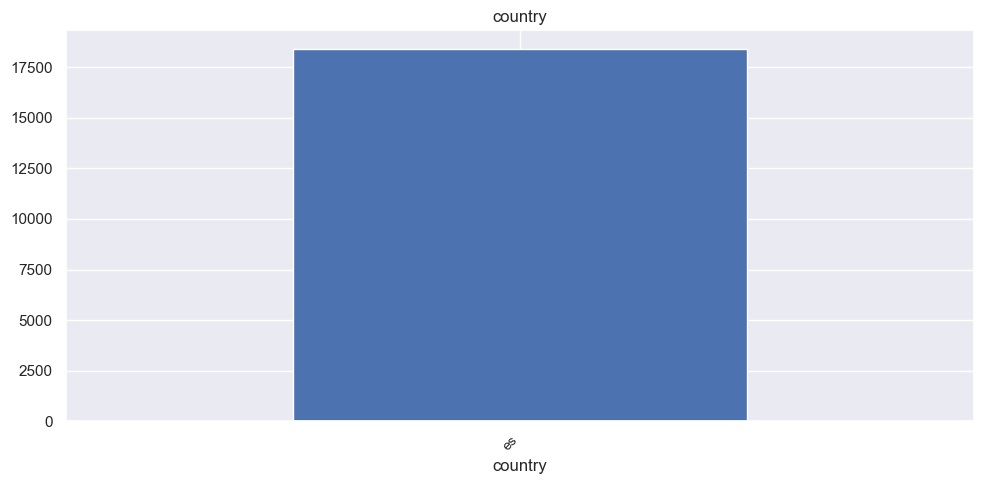


Distribución de la variable: status
status
good              15534
renew              2488
newdevelopment      376
Name: count, dtype: int64


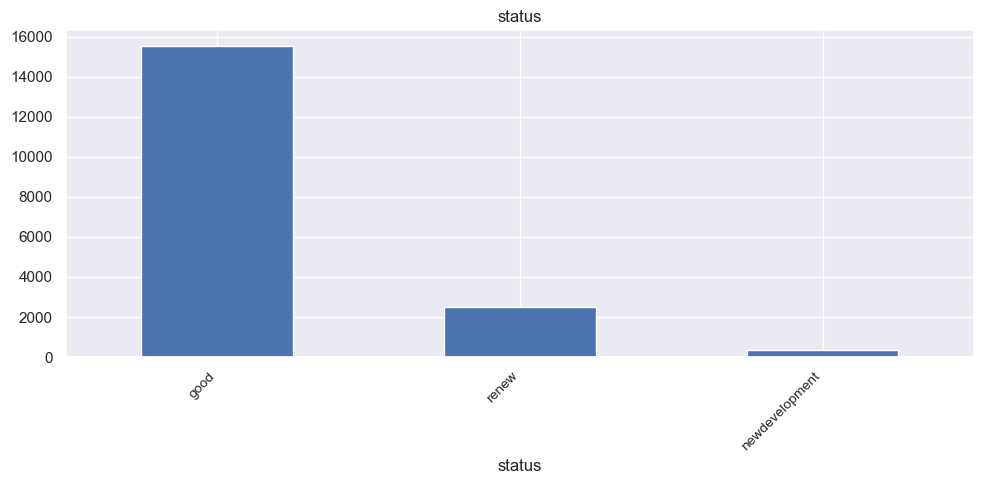


Distribución de la variable: detailedType
detailedType
{'typology': 'flat'}                                           12965
{'typology': 'chalet', 'subTypology': 'independantHouse'}       1223
{'typology': 'flat', 'subTypology': 'penthouse'}                 911
{'typology': 'chalet', 'subTypology': 'terracedHouse'}           829
{'typology': 'flat', 'subTypology': 'duplex'}                    681
{'typology': 'chalet'}                                           609
{'typology': 'countryHouse', 'subTypology': 'casaDePueblo'}      508
{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}       338
{'typology': 'countryHouse', 'subTypology': 'countryHouse'}      179
{'typology': 'countryHouse', 'subTypology': 'casale'}             65
{'typology': 'countryHouse', 'subTypology': 'masia'}              40
{'typology': 'countryHouse', 'subTypology': 'palacio'}            32
{'typology': 'countryHouse', 'subTypology': 'casaTerrera'}         9
{'typology': 'countryHouse'}                   

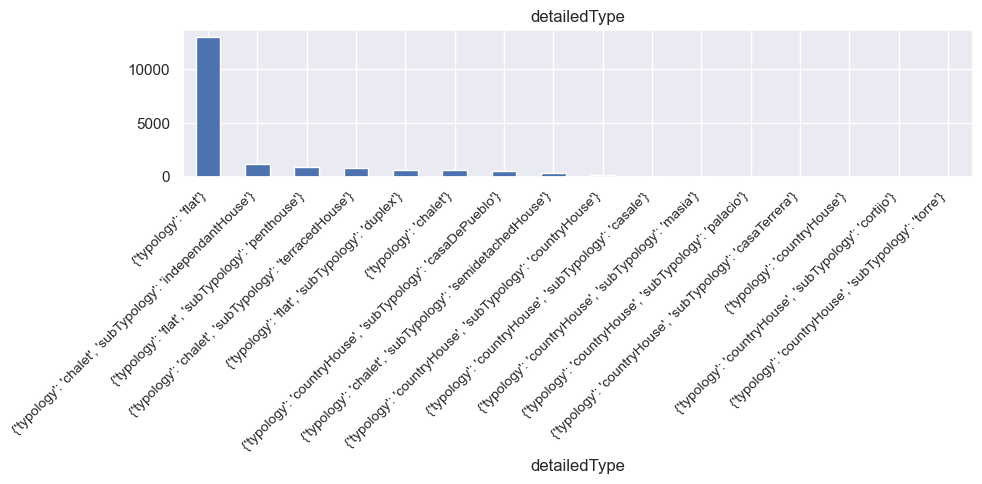


Distribución de la variable: labels
labels
nan                                                                                 17607
[{'name': 'apartamentoType', 'text': 'Apartamento'}]                                  347
[{'name': 'luxuryType', 'text': 'Lujo'}]                                              306
[{'name': 'villaType', 'text': 'Villa'}]                                               78
[{'name': 'masiType', 'text': 'Masi'}]                                                 37
[{'name': 'villaType', 'text': 'Villa'}, {'name': 'luxuryType', 'text': 'Lujo'}]        9
[{'name': 'masiType', 'text': 'Masi'}, {'name': 'luxuryType', 'text': 'Lujo'}]          4
[{'name': 'stoneHouseType', 'text': 'Casa de piedra'}]                                  3
[{'name': 'casaBajaType', 'text': 'Casa baja'}]                                         2
[{'name': 'cortijoType', 'text': 'Cortijo'}]                                            2
[{'name': 'casaMataType', 'text': 'Casa mata'}]         

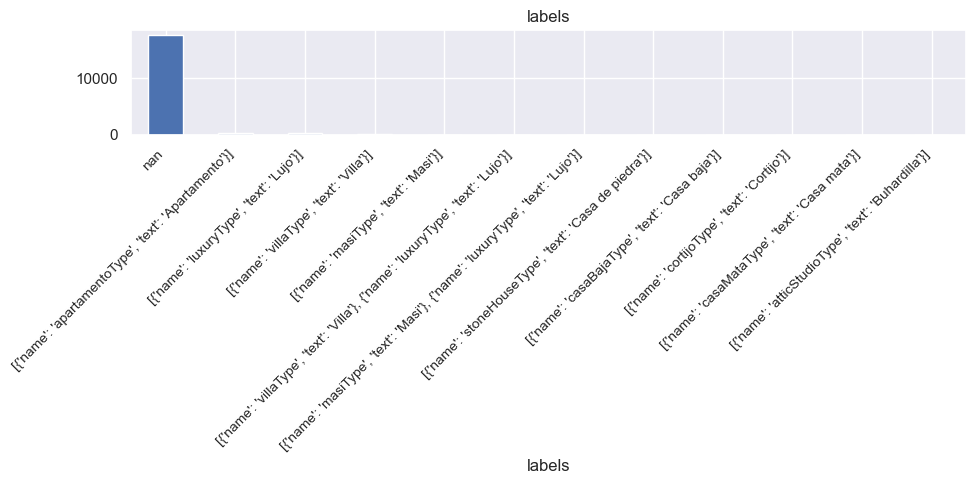

In [83]:
# Paso 3: Recorrer las columnas categóricas filtradas solo analizando aquellas que tienen menos de 30 categorías distintas para evitar gráficos demasiado largos


for col in df_categoricas_filtrado.columns:
    if df_categoricas_filtrado[col].nunique() < 30:
        print(f"\nDistribución de la variable: {col}")
        print(df_categoricas_filtrado[col].value_counts(dropna=False))

        # Ampliamos el tamaño del gráfico
        plt.figure(figsize=(10, 5))  
        df_categoricas_filtrado[col].value_counts(dropna=False).plot(kind='bar', title=col)

        # Ajustamos el espaciado y tamaño de etiquetas
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.tight_layout()
        plt.show()




Distribución de la variable: propertyType
propertyType
flat            12965
chalet           2999
penthouse         911
countryHouse      842
duplex            681
Name: count, dtype: int64


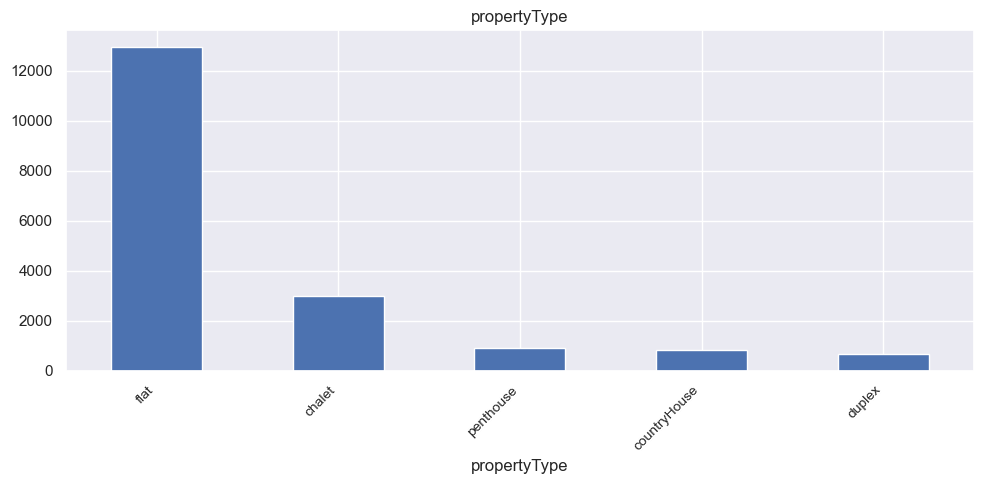


Distribución de la variable: province
province
Barcelona            7360
Tarragona            2113
Teruel               1892
Zaragoza             1272
Castellón            1049
València             1000
Madrid                999
Andorra               513
Málaga                498
Murcia                497
Vizcaya               493
Las Palmas            266
Lleida                265
Girona                109
Cerdanya Francesa      46
Cáceres                17
Álava                   6
Alicante                3
Name: count, dtype: int64


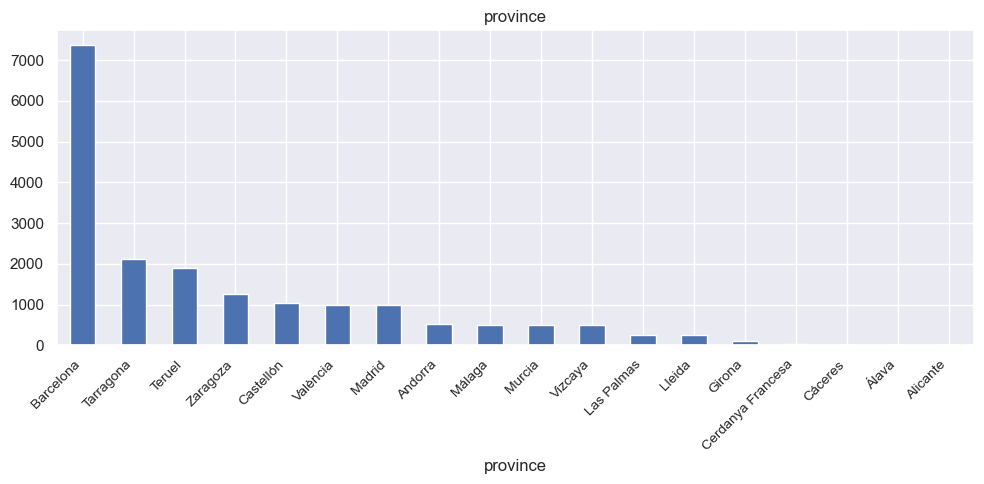


Distribución de la variable: country
country
es    18398
Name: count, dtype: int64


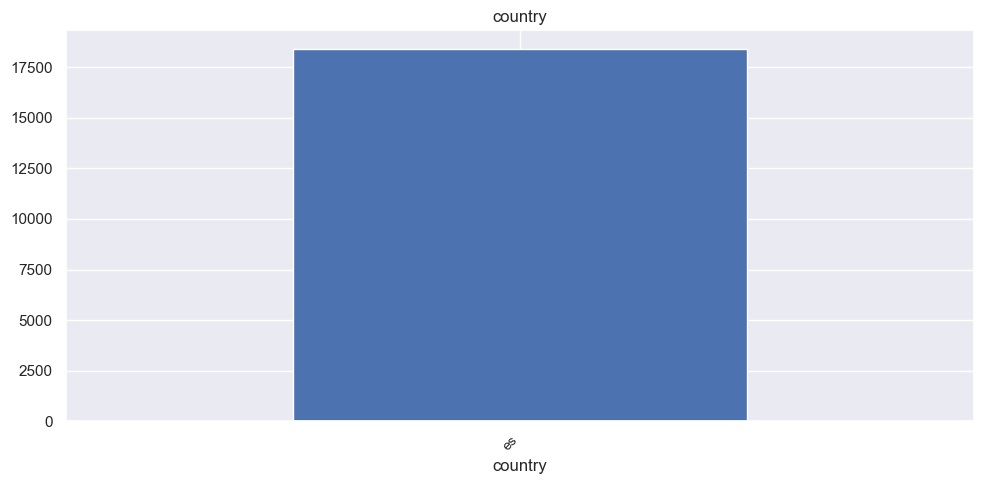


Distribución de la variable: status
status
good              15534
renew              2488
newdevelopment      376
Name: count, dtype: int64


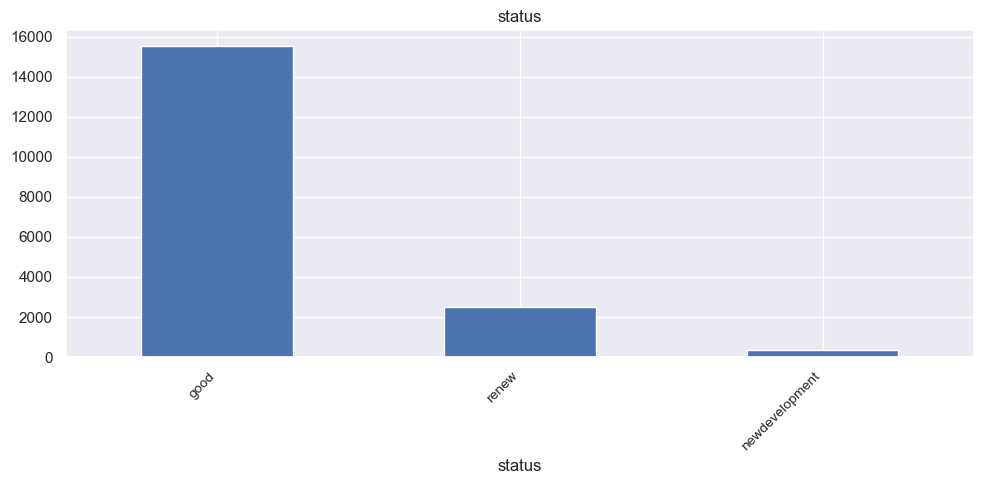

In [84]:
#Con el objetivo de optimizar la interpretación visual del análisis categórico, se decidió excluir variables como labels y detailedType, dado que presentan estructuras complejas (listas de diccionarios o cadenas de texto extensas) que dificultan su representación gráfica y aportan escaso valor visual.

df_categoricas = df_unificado.select_dtypes(include=['object'])
columnas_excluir = ['thumbnail', 'externalReference', 'address', 'labels', 'detailedType']
df_categoricas_filtrado = df_categoricas.drop(columns=columnas_excluir, errors='ignore')

for col in df_categoricas_filtrado.columns:
    if df_categoricas_filtrado[col].nunique() < 30:
        print(f"\nDistribución de la variable: {col}")
        print(df_categoricas_filtrado[col].value_counts(dropna=False))

        # Aumentamos el tamaño del gráfico
        plt.figure(figsize=(10, 5))
        df_categoricas_filtrado[col].value_counts(dropna=False).plot(kind='bar', title=col)

        # Ajustamos rotación, alineación y tamaño del texto de las etiquetas del eje X
        plt.xticks(rotation=45, ha='right', fontsize=10)

        plt.tight_layout()
        plt.show()




### Comprobación y eliminación de nulos

In [ ]:
nulos = df_unificado.isnull().sum()
nulos_totales = nulos[nulos > 0]
print("Columnas con valores nulos:")
print(nulos_totales)


Columnas con valores nulos:
Unnamed: 0.1    12853
Unnamed: 0       3380
index            8022
latitude           68
longitude          68
dtype: int64


In [ ]:
# Se procede a eliminar las columnas Unnamed y index, que no aportan información útil
df_unificado.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'index'], inplace=True)

nulos_despues = df_unificado.isnull().sum()
print("Nulos restantes tras la limpieza de columnas innecesarias:")
print(nulos_despues[nulos_despues > 0])


Nulos restantes tras la limpieza de columnas innecesarias:
latitude     68
longitude    68
dtype: int64


In [ ]:
# Se eliminan las  filas con valores nulos en latitude o longitude
df_unificado.dropna(subset=['latitude', 'longitude'], inplace=True)
print("¿Quedan nulos en latitude o longitude?")
print(df_unificado[['latitude', 'longitude']].isnull().sum())


¿Quedan nulos en latitude o longitude?
latitude     0
longitude    0
dtype: int64


In [81]:
# Se procede a contar cuántos valores son exactamente el string 'nan'
for col in ['status', 'labels', 'detailedType']:
    print(f"Valores 'nan' como string en {col}: {(df_unificado[col] == 'nan').sum()}")

Valores 'nan' como string en status: 0
Valores 'nan' como string en labels: 17607
Valores 'nan' como string en detailedType: 0


In [82]:
# Se procede a eliminar solo los registros con 'nan' como string en 'status'
df_unificado = df_unificado[df_unificado['status'] != 'nan']


Dado que labels contiene un alto porcentaje de 'nan', he decidido mantener esta columna, ya que podría contener información relevante en los pocos registros informados. Sin embargo, sí elimino los 2 registros de status con 'nan', ya que son casos puntuales que no aportan valor.



### Comprobación y eliminación de outliers

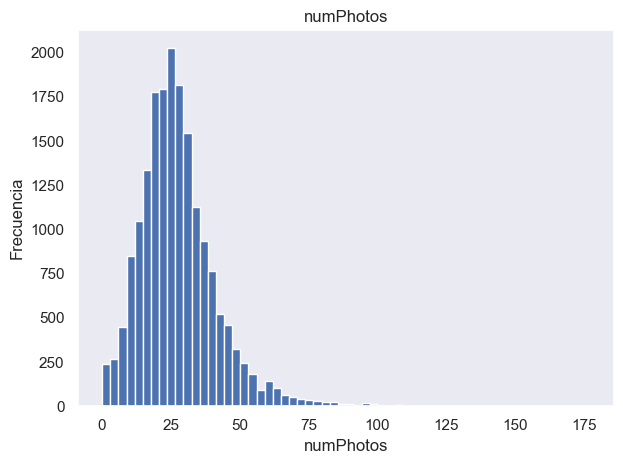

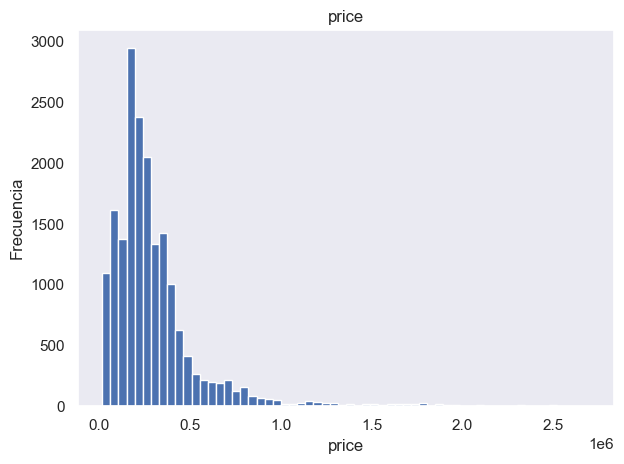

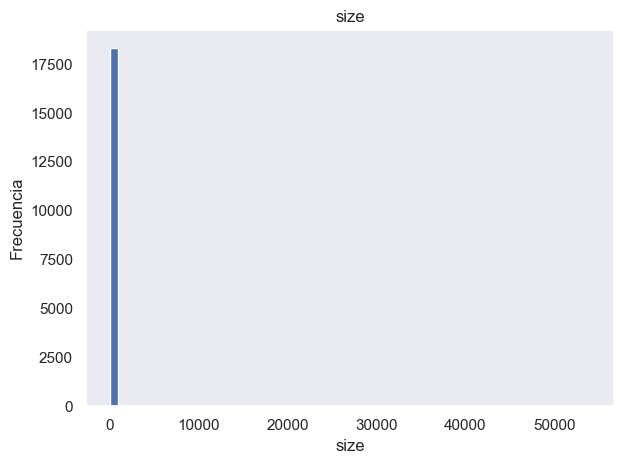

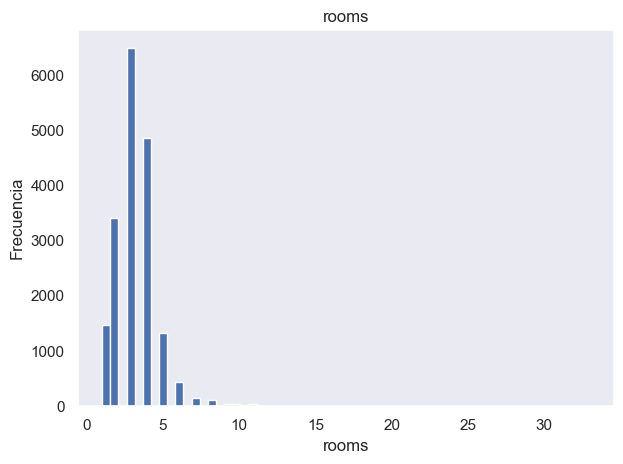

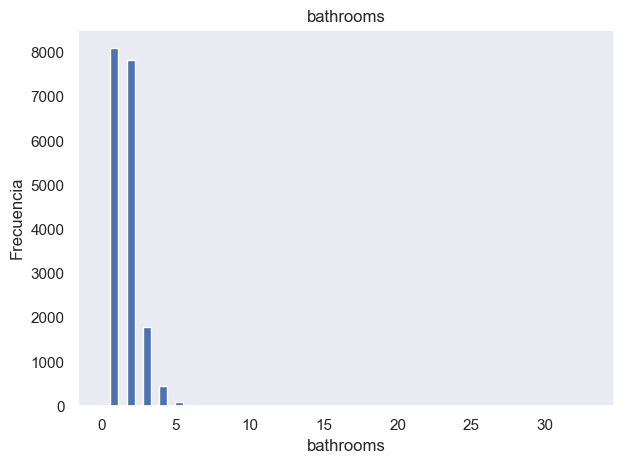

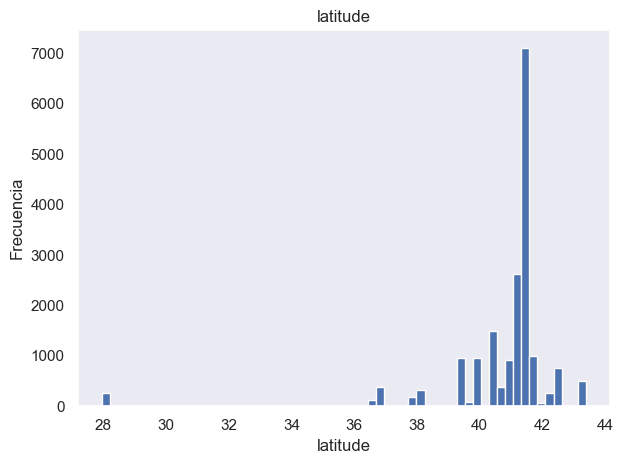

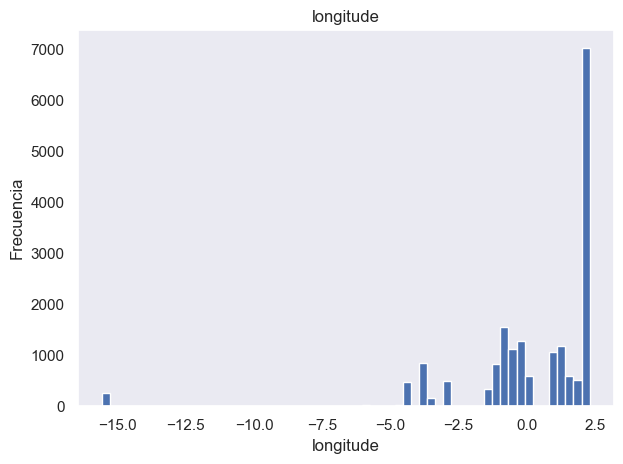

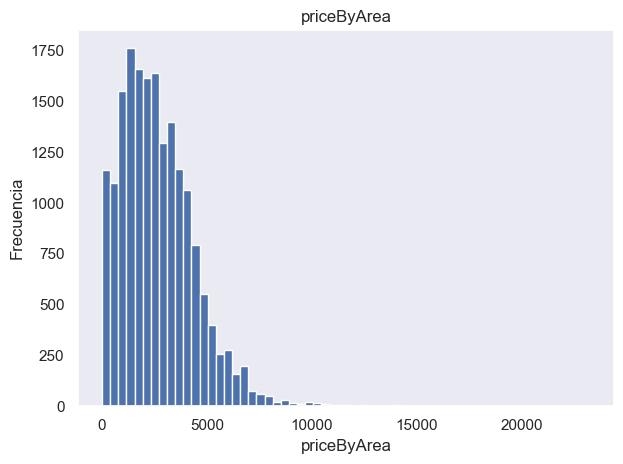

In [ ]:

# Selección de las variables numéricas
df_numericas = df_unificado.select_dtypes(include=['int64', 'float64'])

# Visualización de la distribución de las variables numéricas
for col in df_numericas.columns:
    if df_numericas[col].nunique() > 10:
        df_unificado[col].hist(bins=60)
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.grid(False)
        plt.tight_layout()
        plt.show()


In [65]:
# Función para detectar outliers con IQR
def detectar_outliers_tukey(df, columna, extremo=False):
    q1, q3 = np.percentile(df[columna].dropna(), [25, 75])
    iqr = q3 - q1
    factor = 1.5 if not extremo else 3
    filtro_outliers = (df[columna] < (q1 - factor * iqr)) | (df[columna] > (q3 + factor * iqr))
    return df[filtro_outliers]


In [ ]:
# Detección outliers en variables clave
variables_objetivo = ['price', 'size', 'priceByArea', 'distance']  # adapta según tu análisis

for var in variables_objetivo:
    outliers = detectar_outliers_tukey(df_unificado, var)
    print(f"Número de outliers en '{var}': {outliers.shape[0]}")


Número de outliers en 'price': 1332
Número de outliers en 'size': 1660
Número de outliers en 'priceByArea': 307
Número de outliers en 'distance': 2782


In [ ]:
# Creación de una copia del DataFrame original para trabajar con los datos sin outliers
df_sin_outliers = df_unificado.copy()
for var in variables_objetivo:
    q1, q3 = np.percentile(df_sin_outliers[var].dropna(), [25, 75])
    iqr = q3 - q1
    filtro_outliers = (df_sin_outliers[var] < (q1 - 1.5 * iqr)) | (df_sin_outliers[var] > (q3 + 1.5 * iqr))
    print(f"Registros eliminados por outliers en '{var}': {filtro_outliers.sum()}")
    df_sin_outliers = df_sin_outliers[~filtro_outliers]


Registros eliminados por outliers en 'price': 1332
Registros eliminados por outliers en 'size': 1711
Registros eliminados por outliers en 'priceByArea': 154
Registros eliminados por outliers en 'distance': 1929


Para asegurar un análisis más fiable, he revisado si existían valores atípicos (outliers) en las variables numéricas más importantes: price, size, priceByArea y distance. Para ello he utilizado el método de Tukey, que detecta valores extremos basándose en el rango intercuartílico. Los resultados revelaron bastantes outliers, especialmente en distance (2782 casos) y en size (1661 casos). Estos valores podrían distorsionar las medias y las relaciones entre variables, así que he decidido eliminarlos.

Para hacerlo de forma controlada, he creado una copia del dataset y he aplicado los filtros uno a uno. Al hacerlo de manera secuencial, algunos registros ya se habían eliminado en pasos anteriores, por lo que el número final de eliminaciones varía ligeramente. Por ejemplo, aunque se detectaron 307 outliers en priceByArea, finalmente se eliminaron 154 porque parte de ellos ya se habían eliminado por otras variables. Esta limpieza ayuda a trabajar con un conjunto de datos más coherente y sin distorsiones.





### Comprobar dimensiones y balanceo del dataset (tras terminar limpieza del dataset)

In [ ]:
# Se procede a mostrar las dimensiones del DataFrame final tras eliminar duplicados, columnas inútiles, nulos y outliers
print(f"Dimensiones finales del DataFrame limpio: {df_sin_outliers.shape}")

# Comprobación del balanceo de la variable 'propertyType' (o cualquier otra variable categórica clave)
print("\nDistribución de registros por tipo de propiedad:")
print(df_sin_outliers['propertyType'].value_counts(dropna=False))


Dimensiones finales del DataFrame limpio: (13272, 37)

Distribución de registros por tipo de propiedad:
propertyType
flat            11148
chalet            923
penthouse         692
duplex            394
countryHouse      115
Name: count, dtype: int64


Tras aplicar todos los pasos de limpieza incluyendo la eliminación de duplicados, nulos, columnas sin información y outliers, el dataset final quedó compuesto por 13.273 registros y 37 variables, lo cual supone una base sólida y coherente para el análisis posterior o el entrenamiento de modelos.

Al examinar la variable propertyType, se observa que el conjunto de datos presenta cierto desequilibrio: la mayoría de los inmuebles corresponden a pisos ("flat", más de 11.000 casos), mientras que otros tipos como “chalet”, “penthouse” o “countryHouse” están mucho menos representados. Esta diferencia es relevante a la hora de interpretar resultados o plantear tareas de modelado, ya que puede introducir sesgos si no se tiene en cuenta este desbalance de clases.





## 3. Análisis Exploratorio de Datos (4 puntos)



### Estudio de las variables categóricas


Distribución de la variable: propertyType
propertyType
flat            12965
chalet           2999
penthouse         911
countryHouse      842
duplex            681
Name: count, dtype: int64


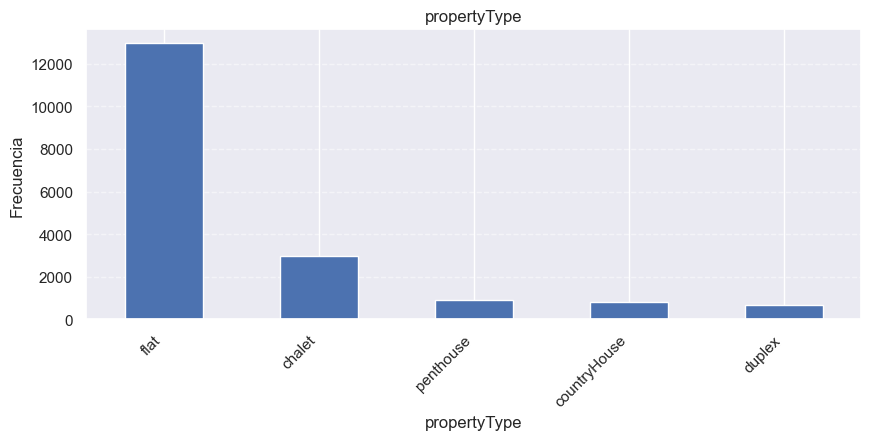


Distribución de la variable: province
province
Barcelona            7360
Tarragona            2113
Teruel               1892
Zaragoza             1272
Castellón            1049
València             1000
Madrid                999
Andorra               513
Málaga                498
Murcia                497
Vizcaya               493
Las Palmas            266
Lleida                265
Girona                109
Cerdanya Francesa      46
Cáceres                17
Álava                   6
Alicante                3
Name: count, dtype: int64


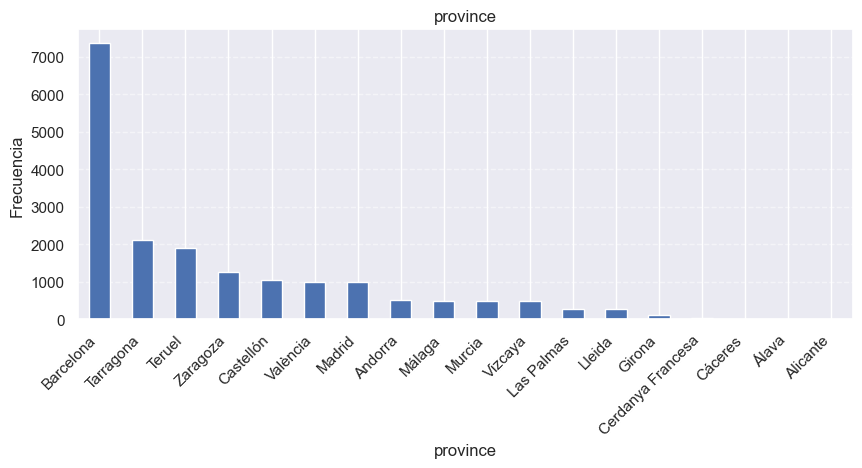


Distribución de la variable: country
country
es    18398
Name: count, dtype: int64


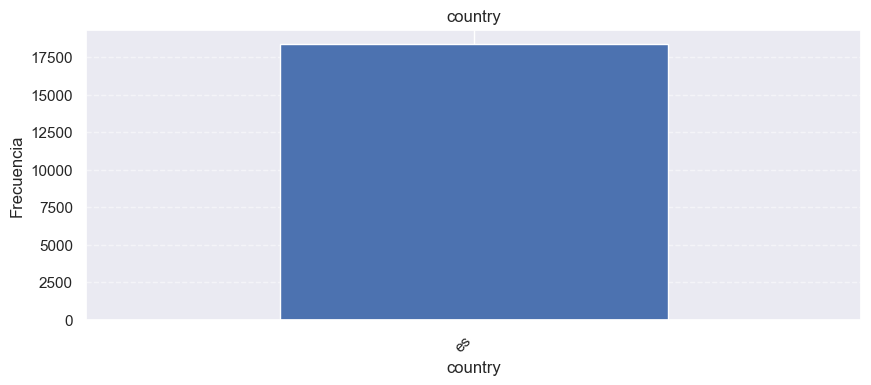


Distribución de la variable: status
status
good              15534
renew              2488
newdevelopment      376
Name: count, dtype: int64


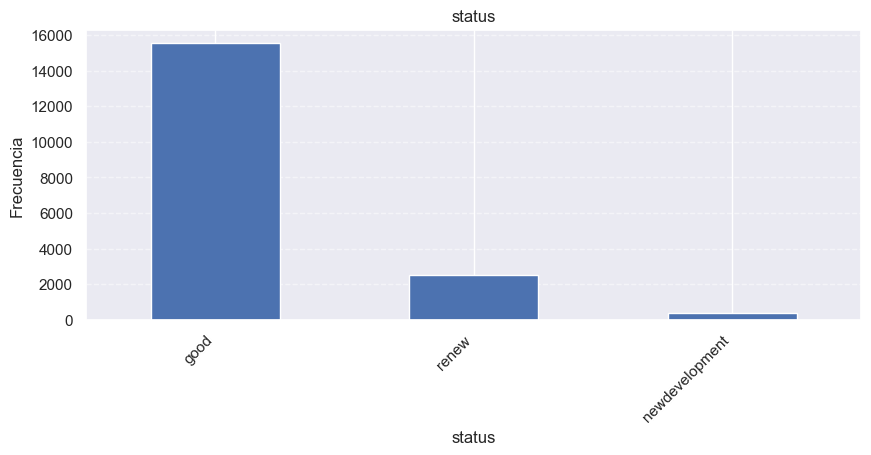


Distribución de la variable: detailedType
detailedType
{'typology': 'flat'}                                           12965
{'typology': 'chalet', 'subTypology': 'independantHouse'}       1223
{'typology': 'flat', 'subTypology': 'penthouse'}                 911
{'typology': 'chalet', 'subTypology': 'terracedHouse'}           829
{'typology': 'flat', 'subTypology': 'duplex'}                    681
{'typology': 'chalet'}                                           609
{'typology': 'countryHouse', 'subTypology': 'casaDePueblo'}      508
{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}       338
{'typology': 'countryHouse', 'subTypology': 'countryHouse'}      179
{'typology': 'countryHouse', 'subTypology': 'casale'}             65
{'typology': 'countryHouse', 'subTypology': 'masia'}              40
{'typology': 'countryHouse', 'subTypology': 'palacio'}            32
{'typology': 'countryHouse', 'subTypology': 'casaTerrera'}         9
{'typology': 'countryHouse'}                   

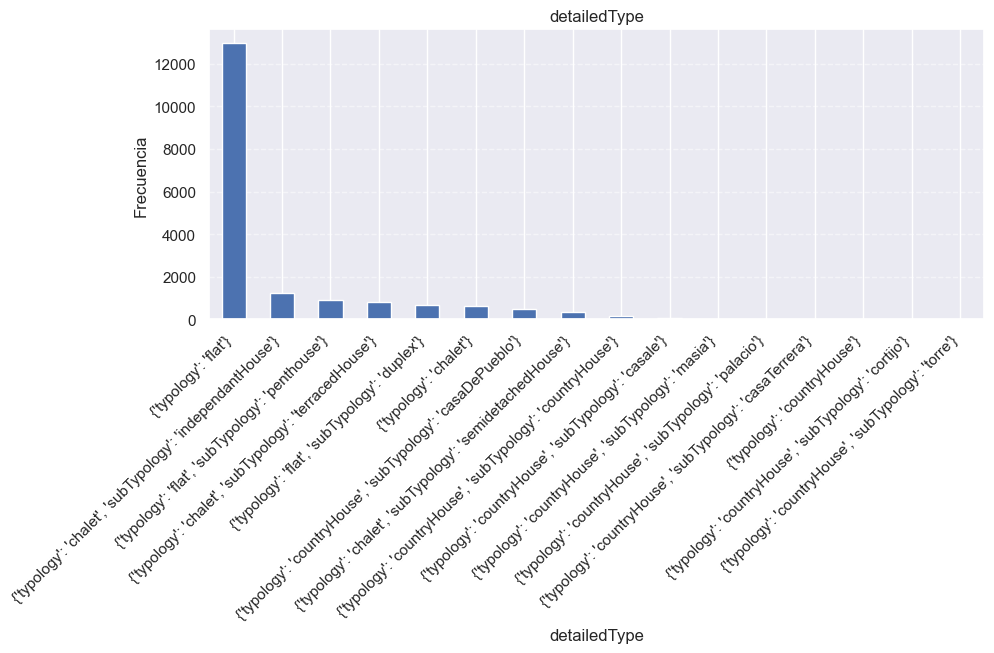


Distribución de la variable: labels
labels
nan                                                                                 17607
[{'name': 'apartamentoType', 'text': 'Apartamento'}]                                  347
[{'name': 'luxuryType', 'text': 'Lujo'}]                                              306
[{'name': 'villaType', 'text': 'Villa'}]                                               78
[{'name': 'masiType', 'text': 'Masi'}]                                                 37
[{'name': 'villaType', 'text': 'Villa'}, {'name': 'luxuryType', 'text': 'Lujo'}]        9
[{'name': 'masiType', 'text': 'Masi'}, {'name': 'luxuryType', 'text': 'Lujo'}]          4
[{'name': 'stoneHouseType', 'text': 'Casa de piedra'}]                                  3
[{'name': 'casaBajaType', 'text': 'Casa baja'}]                                         2
[{'name': 'cortijoType', 'text': 'Cortijo'}]                                            2
[{'name': 'casaMataType', 'text': 'Casa mata'}]         

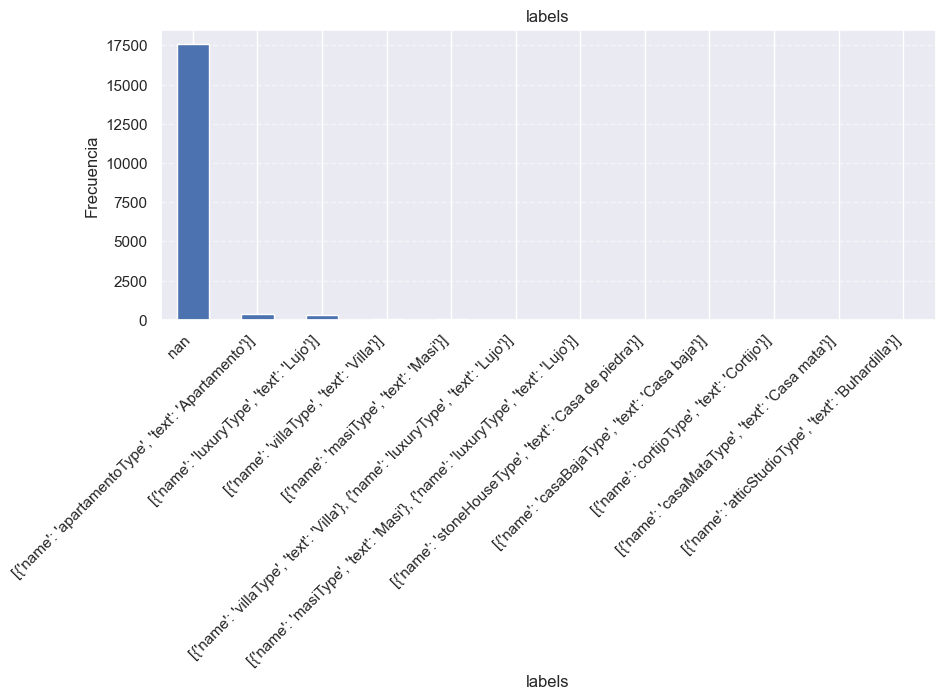

In [ ]:
import matplotlib.pyplot as plt

# Selección de algunas variables categóricas relevantes para el análisis
variables_categoricas = ['propertyType', 'province', 'country', 'status', 'detailedType', 'labels']

# Estudio gráfico de variables categóricas
for var in variables_categoricas:
    print(f"\nDistribución de la variable: {var}")
    print(df_unificado[var].value_counts())

    plt.figure(figsize=(10, 5))
    df_unificado[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.3)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()




### Convertir 3 variables categóricas a dummy. Se recomienda utilizar variables que no contengan demasiados posibles valores.

In [ ]:
# Conversión de variables categóricas a dummy
dummy_variables = ['propertyType', 'status', 'country']

# Creación  del nuevo DataFrame con las variables dummy
df_dummies = pd.get_dummies(df_unificado, columns=dummy_variables)
df_dummies.head()


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,size,exterior,rooms,bathrooms,...,newDevelopmentFinished,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,status_good,status_newdevelopment,status_renew,country_es
0,37423711,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/75/65/7d/1051146532.jpg,Z-2030,31.0,2,285000.0,63.0,True,2.0,2.0,...,True,False,False,False,True,False,True,False,False,True
1,100030792,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/08/c0/ea/1065800123.jpg,2019,54.0,nan,178216.0,65.0,True,2.0,1.0,...,True,False,False,False,True,False,True,False,False,True
2,95563945,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/cf/05/33/921983717.jpg,52931158,13.0,nan,333000.0,97.0,False,4.0,1.0,...,True,False,False,False,True,False,True,False,False,True
3,96266051,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/dd/0e/ff/942136095.jpg,4113 ALIV,27.0,2,481000.0,65.0,True,2.0,1.0,...,True,False,False,False,True,False,True,False,False,True
4,95845899,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/17/29/61/930553000.jpg,52457390,10.0,nan,481000.0,72.0,False,2.0,1.0,...,True,False,False,False,True,False,True,False,False,True




### Crear variables derivadas en caso que nos parezca interesante incluir alguna

In [ ]:
# Creación de una variable derivada que representa el precio por metro cuadrado
df_dummies['priceByArea'] = df_dummies['price'] / df_dummies['size']
df_dummies[['price', 'size', 'priceByArea']].head()


,price,size,priceByArea
0,285000.0,63.0,4523.809524
1,178216.0,65.0,2741.784615
2,333000.0,97.0,3432.989691
3,481000.0,65.0,7400.000000
4,481000.0,72.0,6680.555556




### Cálculo de la matriz de correlación

In [ ]:
# Cálculo de la matriz de correlación (solo variables numéricas)
correlation_matrix = df_dummies.corr(numeric_only=True)
correlation_matrix.head()


,propertyCode,numPhotos,price,size,exterior,rooms,bathrooms,latitude,longitude,showAddress,...,newDevelopmentFinished,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,status_good,status_newdevelopment,status_renew,country_es
propertyCode,1.000000,0.027331,0.013188,-0.036073,0.120189,-0.071246,-0.074952,0.007631,0.021138,-0.028087,...,-0.012808,-0.104853,-0.082353,-0.005455,0.115872,0.018950,-0.023614,0.011669,0.020207,NaN
numPhotos,0.027331,1.000000,0.209001,0.048735,-0.016947,0.249189,0.276089,-0.053847,-0.028544,0.021708,...,0.067100,0.144388,0.053077,0.048418,-0.177305,0.033726,0.066526,-0.056814,-0.047021,NaN
price,0.013188,0.209001,1.000000,0.064970,0.061025,0.221585,0.431319,0.141104,0.224252,-0.102721,...,0.005203,0.063181,-0.124399,0.017509,-0.065417,0.134577,0.013641,0.001991,-0.015286,NaN
size,-0.036073,0.048735,0.064970,1.000000,-0.102885,0.177085,0.173201,-0.007913,-0.014219,0.022863,...,0.009446,0.094342,0.136440,-0.002828,-0.131401,-0.013293,-0.031662,-0.009951,0.037683,NaN
exterior,0.120189,-0.016947,0.061025,-0.102885,1.000000,-0.214553,-0.168948,0.073837,0.121569,-0.028145,...,-0.061522,-0.589543,-0.292561,0.118554,0.500434,0.130120,-0.022659,0.065683,-0.003155,NaN




### Pintar la matriz de correlación

In [ ]:
# Se procede a crear una copia de la matriz de correlación con valores absolutos
correlation_matrix_abs = correlation_matrix.abs()


c:\Users\crist\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


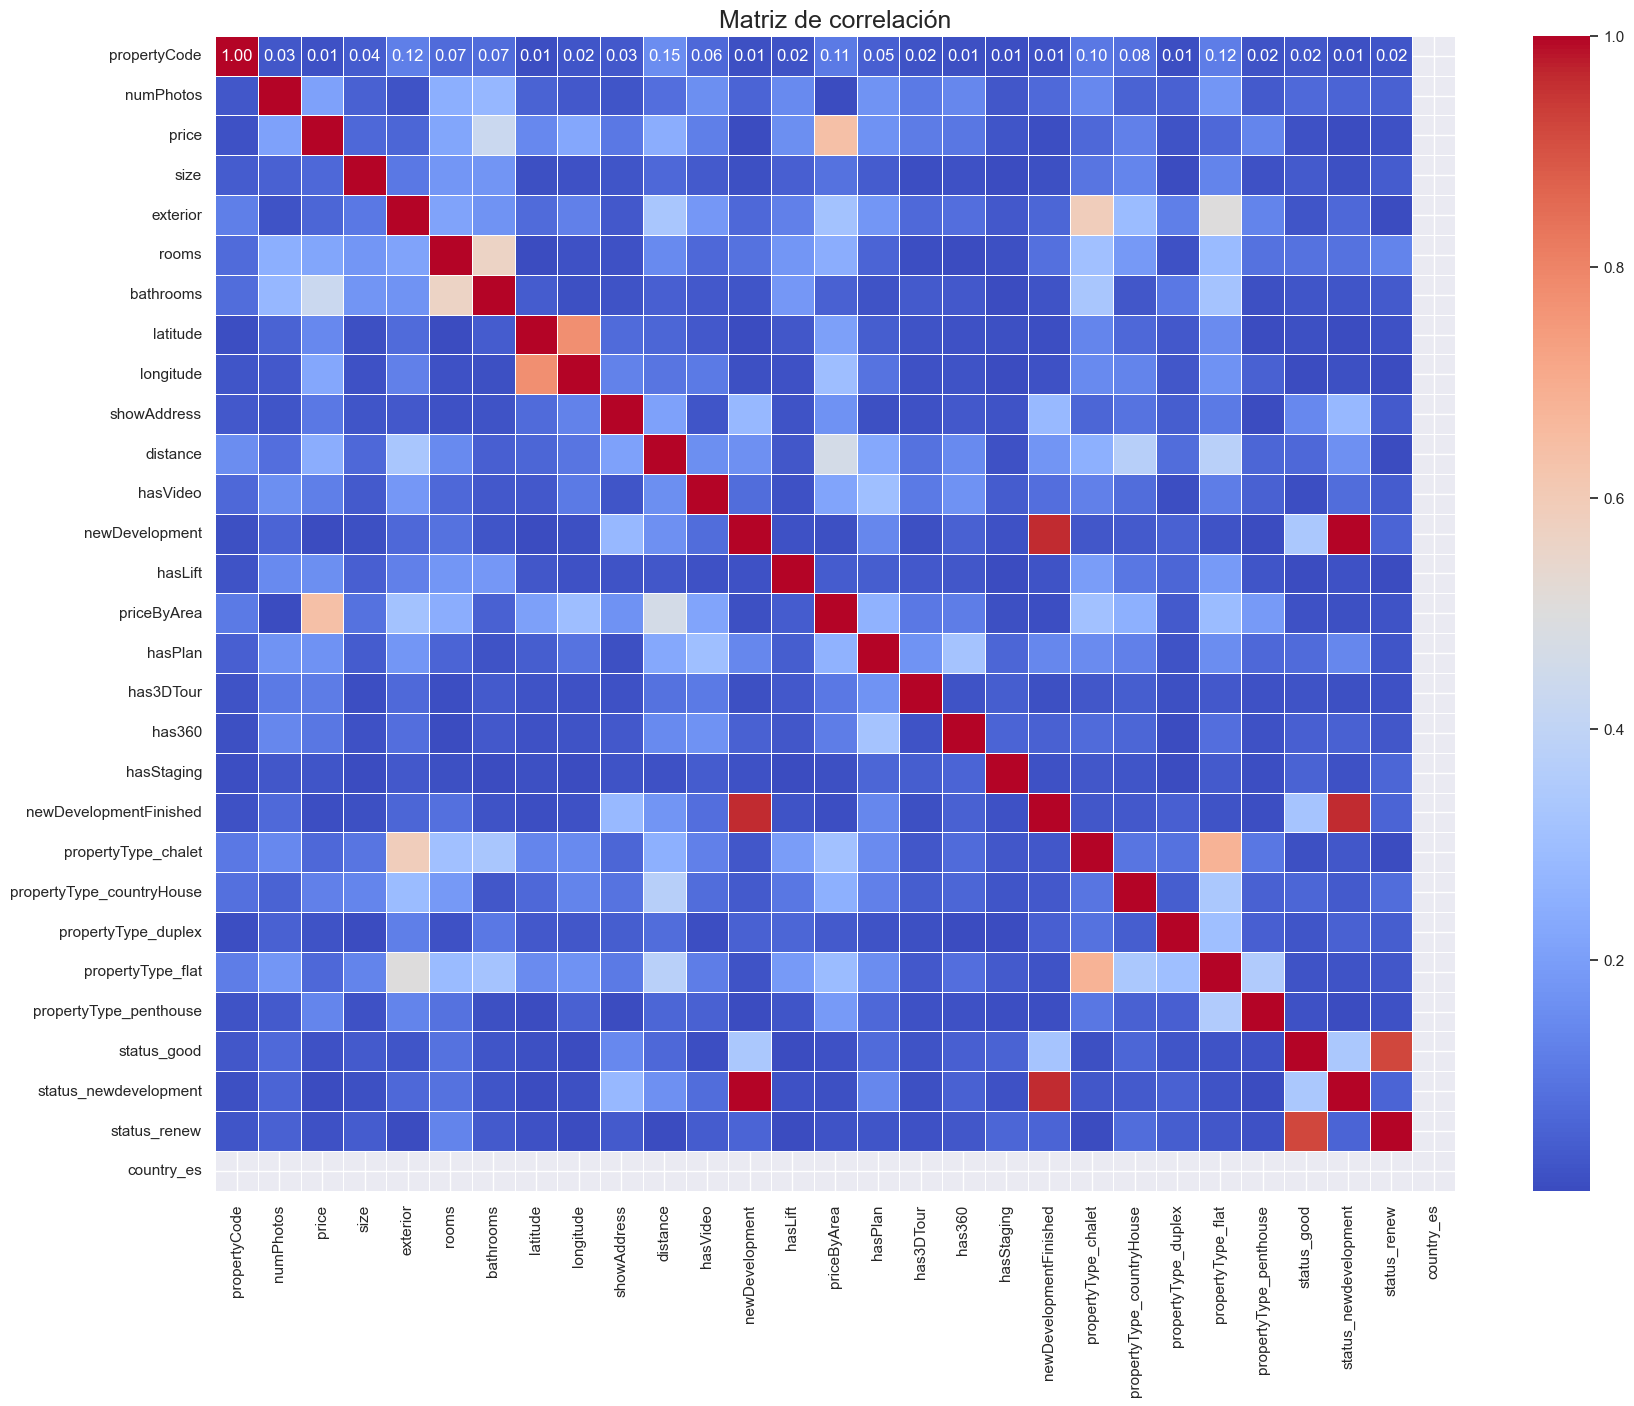

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Pintamos el heatmap de correlaciones absolutas
sns.heatmap(correlation_matrix_abs, 
            xticklabels=correlation_matrix_abs.columns,
            yticklabels=correlation_matrix_abs.columns,
            cmap='coolwarm', 
            annot=True,  # 
            fmt='.2f',
            linewidths=0.5)

plt.title("Matriz de correlación", fontsize=18)
plt.show()


Se destaca que price y size tienen una correlación moderada positiva, lo cual es lógico ya que los pisos más grandes suelen tener precios más altos. Price y priceByArea también están correlacionados, pero no tan fuertemente. Muchas variables binarias (como hasLift, hasVideo, etc.) tienen correlación muy baja con otras, como se ve por los tonos azulados. 



### Comprobar si hay variables correlacionadas

In [ ]:
# Recorremos la matriz de correlaciones absolutas e identificamos pares con correlación > 0.8
lista_corr = []
for fila in correlation_matrix_abs.columns:
    for columna in correlation_matrix_abs.columns:
        if fila != columna:
            valor_corr = correlation_matrix_abs.loc[fila, columna]
            if valor_corr > 0.8:
                lista_corr.append([fila, columna, valor_corr])

# Creamos DataFrame con las correlaciones encontradas
df_corr = pd.DataFrame(lista_corr, columns=['varX', 'varY', 'corr'])
df_corr = df_corr[df_corr['varX'] < df_corr['varY']]
df_corr = df_corr.sort_values(by='corr', ascending=False)
df_corr.head(10)


,varX,varY,corr
1,newDevelopment,status_newdevelopment,1.000000
0,newDevelopment,newDevelopmentFinished,0.961299
3,newDevelopmentFinished,status_newdevelopment,0.961299
4,status_good,status_renew,0.920969


Tras calcular la matriz de correlación, se analizaron aquellas variables cuya correlación supera el umbral de 0.8, ya que este valor sugiere una relación fuerte entre ellas. En la tabla se observan varios pares de variables muy correlacionadas, destacando especialmente newDevelopment, status_newdevelopment y newDevelopmentFinished, que presentan valores de correlación superiores al 0.96 e incluso uno de ellos con correlación perfecta (1.00).

Esto indica que estas variables están prácticamente duplicando la misma información, lo cual puede generar redundancia en modelos predictivos. De igual modo, la alta correlación entre status_good y status_renew (0.92) sugiere que probablemente se excluyan mutuamente o estén relacionadas con una misma situación inmobiliaria. 